In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from preprocess import preprocess
from extract_features import extract_features


# load the data
print("Load the train, test and store data")
train = pd.read_csv("input/train.csv", parse_dates=[2])
test = pd.read_csv("input/test.csv", parse_dates=[3])
store = pd.read_csv("input/store.csv")

# preprocess the data
print("Preprocess the data")
preprocessed_df = preprocess(train, test, store)

# define a feature list to store all feature names
features = []
# extract features from preprocessed data
print("Extract features")
features_df = extract_features(features, preprocessed_df)

# split train and test set
train_df = features_df[features_df['Set'] == 1]
test_df = features_df[features_df['Set'] == 0]

# use the last 6 weeks of the train set as validation set
timeDelta = test_df.Date.max() - test_df.Date.min()
maxDate = train_df.Date.max()
minDate = maxDate - timeDelta
# valid_indices is a list of boolean values which are true when date is within the last 6 weeks of train_df
valid_indices = train_df['Date'].apply(lambda x: (x >= minDate and x <= maxDate))
# train_indices is list of boolean values to get the train set
train_indices = valid_indices.apply(lambda x: (not x))

# split the train and valid set
X_train = train_df[train_indices]
X_valid = train_df[valid_indices]


# merge the features from 5 models above in the model description
features_used = []
for model_index in [24086]:
	with open('output/features/{}.txt'.format('features_' + str(model_index)), 'r') as ft:
		fts = ft.readlines()[0].split("'")
		fts = [f for f in fts if len(f) > 2]
		features_used += fts

features_used = list(set(features_used))

In [2]:
xgb_24086_tuned = pd.read_csv('output/valid_prediction/valid_24086_tuned.csv')
xgb_20003 = pd.read_csv('output/valid_prediction/valid_20003.csv')
xgb_21038 = pd.read_csv('output/valid_prediction/valid_21038.csv')
xgb_basic = pd.read_csv('output/valid_prediction/valid_basic.csv')

X_valid['pred_24086'] = xgb_24086_tuned.Sales.values
X_valid['pred_20003'] = xgb_20003.Sales.values
X_valid['pred_21038'] = xgb_21038.Sales.values
X_valid['pred_basic'] = xgb_basic.Sales.values

X_valid['pred_blending'] = (xgb_24086_tuned.Sales + xgb_20003.Sales + xgb_21038.Sales + xgb_basic.Sales) * 0.995 / 4 

/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [3]:
X_valid

,Customers,Date,DayOfWeek,Id,Open,Promo,Sales,SchoolHoliday,Set,StateHoliday,...,holidays_nextweek,AvgSalesPerDow,AvgCustsPerDow,medianSalesPerDow,medianCustsPerDow,pred_224,pred_20003,pred_21038,pred_basic,pred_blending
0,555.0,2015-07-31,4,0.0,1.0,1,5263.0,1,1,0,...,7,4726.480620,562.248062,4651.0,552.0,5290.789062,5301.296387,5399.551758,5259.923340,5286.325686
1,625.0,2015-07-31,4,0.0,1.0,1,6064.0,1,1,0,...,0,4669.589147,562.457364,4671.0,545.0,5608.529785,5961.743164,5831.798828,5841.017578,5781.718477
2,821.0,2015-07-31,4,0.0,1.0,1,8314.0,1,1,0,...,0,7193.203125,787.335938,7111.0,768.0,9088.557617,9212.733398,9849.037109,8818.416992,9195.975348
3,1498.0,2015-07-31,4,0.0,1.0,1,13995.0,1,1,0,...,0,9470.410853,1302.565891,9353.0,1286.0,12482.168945,12417.029297,12614.003906,12686.043945,12487.062466
4,559.0,2015-07-31,4,0.0,1.0,1,4822.0,1,1,0,...,0,4858.054688,569.125000,4792.0,563.0,6323.798828,6291.964844,6470.336426,6307.594238,6316.681466
5,589.0,2015-07-31,4,0.0,1.0,1,5651.0,1,1,0,...,0,5827.906250,672.070312,5655.0,653.0,6408.865234,6571.047852,6674.523438,6583.387695,6526.658774
6,1414.0,2015-07-31,4,0.0,1.0,1,15344.0,1,1,0,...,0,9265.015385,1028.484615,9200.0,1013.0,13147.088867,12864.260742,14043.603516,13067.071289,13214.103573
7,833.0,2015-07-31,4,0.0,1.0,1,8492.0,1,1,0,...,0,5196.496124,619.100775,5032.0,610.0,6708.490723,7031.344238,7159.111328,6582.320312,6835.965067
8,687.0,2015-07-31,4,0.0,1.0,1,8565.0,1,1,0,...,0,6513.562500,580.421875,6238.0,567.0,8469.387695,8768.489258,8986.140625,8311.506836,8590.711698
9,681.0,2015-07-31,4,0.0,1.0,1,7185.0,1,1,0,...,0,5604.069767,602.953488,5562.0,602.0,6481.324707,7009.568359,6966.597168,6512.091309,6708.683409


In [8]:
X_valid['rmspe'] = (X_valid['pred_blending'] - X_valid['Sales']) / X_valid['Sales']

/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
X_valid['rmspe'] = abs(X_valid['rmspe'])

/home/max/anaconda3/envs/compet/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
mean_rmspe = X_valid.groupby(['Date'])['rmspe'].mean().reset_index(name='mean_rmspe')
std_rmspe = X_valid.groupby(['Date'])['rmspe'].std().reset_index(name='std_rmspe')

In [16]:
groupby_date = pd.merge(mean_rmspe, std_rmspe, on='Date', how='left')

In [18]:
mean_rmspe = X_valid.groupby(['Store'])['rmspe'].mean().reset_index(name='mean_rmspe')
std_rmspe = X_valid.groupby(['Store'])['rmspe'].std().reset_index(name='std_rmspe')

groupby_store = pd.merge(mean_rmspe, std_rmspe, on='Store', how='left')

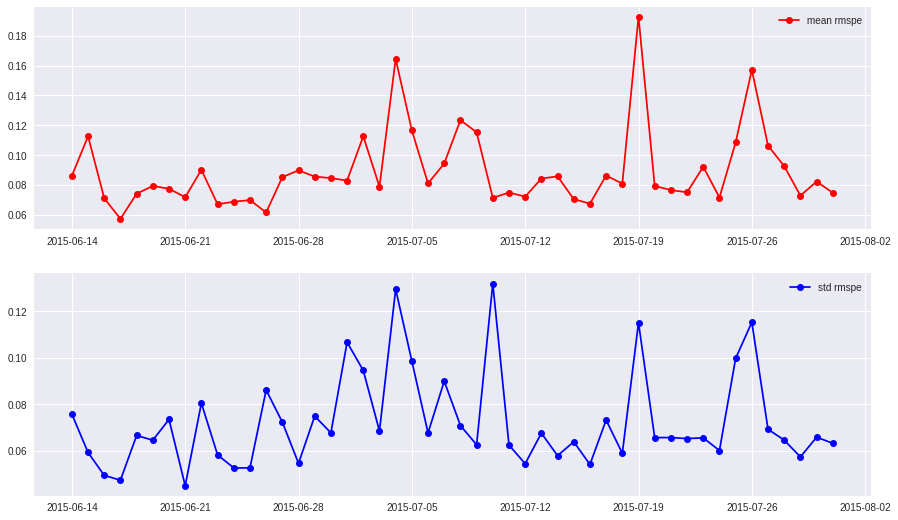

In [20]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,9))
ax1.plot_date(groupby_date['Date'], groupby_date['mean_rmspe'], color='r', label='mean rmspe', linestyle="-")
ax2.plot_date(groupby_date['Date'], groupby_date['std_rmspe'], color='b', label='std rmspe', linestyle="-")

ax1.legend()
ax2.legend()

plt.show()

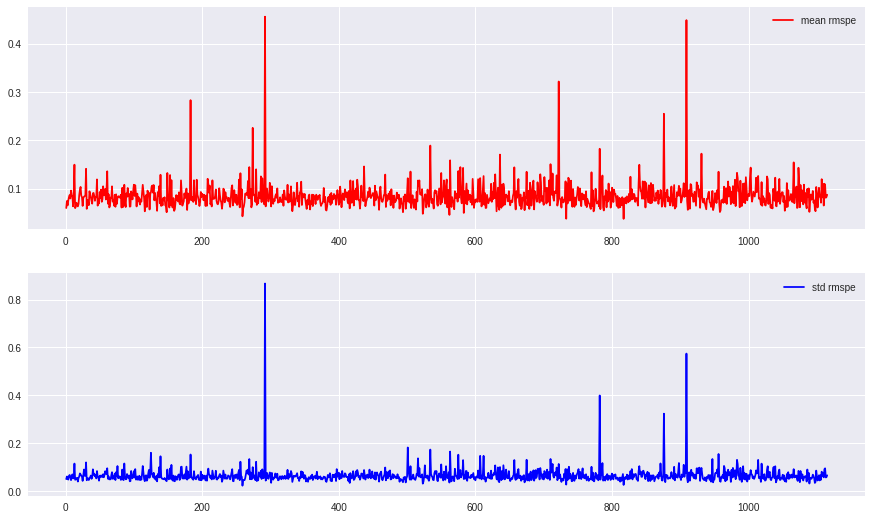

In [25]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,9))
ax1.plot(groupby_store['Store'], groupby_store['mean_rmspe'], color='r', label='mean rmspe', linestyle="-")
ax2.plot(groupby_store['Store'], groupby_store['std_rmspe'], color='b', label='std rmspe', linestyle="-")

ax1.legend()
ax2.legend()

plt.show()

In [27]:
groupby_store[groupby_store['mean_rmspe'] > 0.4]

,Store,mean_rmspe,std_rmspe
291,292,0.456263,0.866829
908,909,0.449097,0.574434


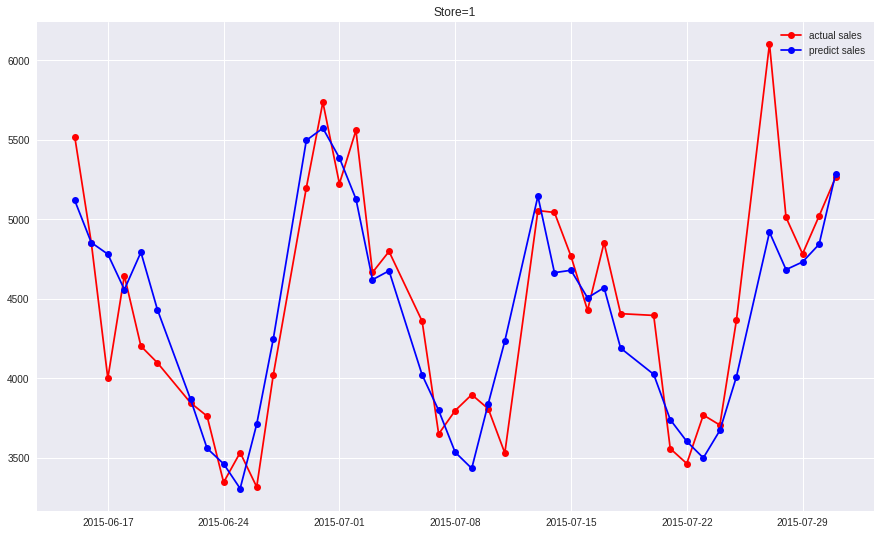

In [31]:
store_df = X_valid[X_valid['Store'] == 1]

fig, ax = plt.subplots(1,1,figsize=(15,9))
ax.plot_date(store_df['Date'], store_df['Sales'], color='r', label='actual sales', linestyle="-")
ax.plot_date(store_df['Date'], store_df['pred_blending'], color='b', label='predict sales', linestyle="-")

ax.legend()
ax.set_title('Store=1')

plt.show()

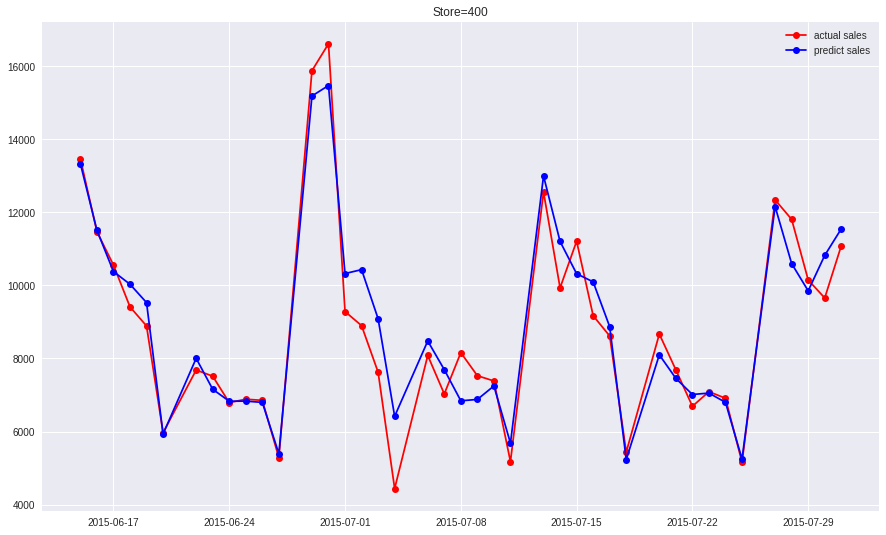

In [32]:
store_df = X_valid[X_valid['Store'] == 400]

fig, ax = plt.subplots(1,1,figsize=(15,9))
ax.plot_date(store_df['Date'], store_df['Sales'], color='r', label='actual sales', linestyle="-")
ax.plot_date(store_df['Date'], store_df['pred_blending'], color='b', label='predict sales', linestyle="-")

ax.legend()
ax.set_title('Store=400')

plt.show()

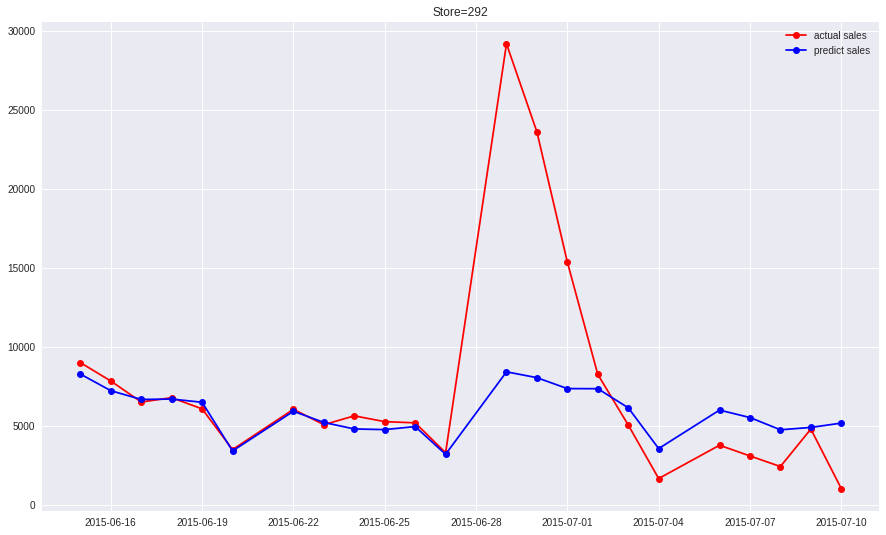

In [33]:
store_df = X_valid[X_valid['Store'] == 292]

fig, ax = plt.subplots(1,1,figsize=(15,9))
ax.plot_date(store_df['Date'], store_df['Sales'], color='r', label='actual sales', linestyle="-")
ax.plot_date(store_df['Date'], store_df['pred_blending'], color='b', label='predict sales', linestyle="-")

ax.legend()
ax.set_title('Store=292')
plt.show()

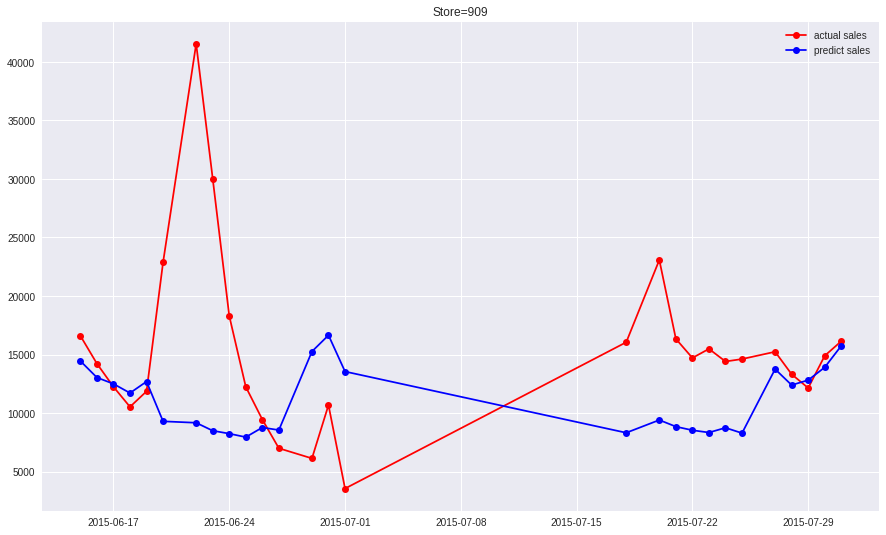

In [34]:
store_df = X_valid[X_valid['Store'] == 909]

fig, ax = plt.subplots(1,1,figsize=(15,9))
ax.plot_date(store_df['Date'], store_df['Sales'], color='r', label='actual sales', linestyle="-")
ax.plot_date(store_df['Date'], store_df['pred_blending'], color='b', label='predict sales', linestyle="-")

ax.legend()
ax.set_title('Store=909')

plt.show()